In [1]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

import numpy as np
from scipy.special import gamma, gammainc
from scipy.stats import uniform

from polydispers.stats import sz_distribution_inverse_transform
from polydispers.input_config import InputConfig, PolymerConfig, BeadTypeConfig

sns.set_theme()


In [7]:
PDI = 1.2
Mn = 100000
chains = 1000

config_string = """
num_chains: 100
mn: 100000
pdi: 1.2
box_size: 100
output_dir: .
seed: 42
polymer:
  repeat_unit_topology: AA
  bond_length: 1
  bead_radius: 1
  bead_types:
    A:
      mass: 1
      type_id: 1
"""

config = InputConfig.from_string(config_string)

r, b = sz_distribution_inverse_transform(config)

In [8]:
b

array([ 132,  433, 1049,  402,  809,  565,  222,  505,  655,  552,  387,
        355,  534, 1278,  649,  551,  415,  539,  289,  363,  244,  526,
        209,  564,  282,  618,  586,  405,  686,  993,  384,  510,  605,
        678,  477,  366,  379,  838,  369,  441,  468,  352,  421,  387,
        357,  435,  470,  469,  375,  350,  615,  416,  476,  240,  349,
       1214,  344,  450,  401,  243,  748,  298,  944,  486,  611,  461,
        527,  637,  219,  294,  298,  533,  700,  716,  196,  441,  668,
        491,  943,  286,  476,  276,  981,  581,  423,  356,  420,  768,
        416,  256,  558,  513,  522,  478,  467,  229,  399,  780,  314,
        614])

In [9]:
r

array([ 264,  866, 2098,  804, 1618, 1130,  444, 1010, 1310, 1104,  774,
        710, 1068, 2556, 1298, 1102,  830, 1078,  578,  726,  488, 1052,
        418, 1128,  564, 1236, 1172,  810, 1372, 1986,  768, 1020, 1210,
       1356,  954,  732,  758, 1676,  738,  882,  936,  704,  842,  774,
        714,  870,  940,  938,  750,  700, 1230,  832,  952,  480,  698,
       2428,  688,  900,  802,  486, 1496,  596, 1888,  972, 1222,  922,
       1054, 1274,  438,  588,  596, 1066, 1400, 1432,  392,  882, 1336,
        982, 1886,  572,  952,  552, 1962, 1162,  846,  712,  840, 1536,
        832,  512, 1116, 1026, 1044,  956,  934,  458,  798, 1560,  628,
       1228])

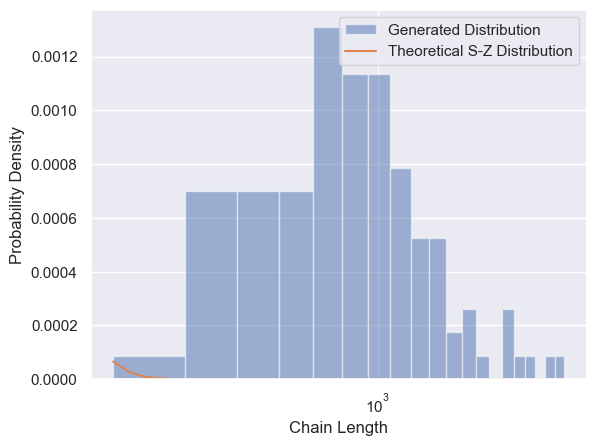

In [11]:
from scipy.stats import gamma

plt.hist(r, bins=20, density=True, alpha=0.5, label="Generated Distribution")
# X-Axis is the logarithim of the size
plt.xscale('log')

# Plot histogram
# Plot theoretical Schulz-Zimm distribution
x = np.linspace(min(r), max(r), 100)
z = 1 / (PDI - 1)
sz_dist = gamma.pdf(x, a=z+1, scale=Mn/chains/(z+1)) 
plt.plot(x, sz_dist, label="Theoretical S-Z Distribution")

plt.xlabel("Chain Length")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


In [70]:
chain_lengths = [1367, 425, 2047, 1790, 2153, 1091, 1111, 1646, 801, 2347, 958, 2673, 2926, 2507,
 2336, 4275, 2092, 2337, 2544, 1409, 3069, 881, 2388, 1565, 2973, 966, 1380, 2061,
 2807, 1316, 1581, 1794, 2844, 2179, 2755, 2632, 3742, 1905, 875, 2920, 2956, 1563,
 3024, 1968, 1271, 1908, 1145, 1617, 1582, 1473]

print(f"Sum of chain lengths: {sum(chain_lengths)}, difference: {sum(chain_lengths) - Mn}")


Sum of chain lengths: 99975, difference: 99875


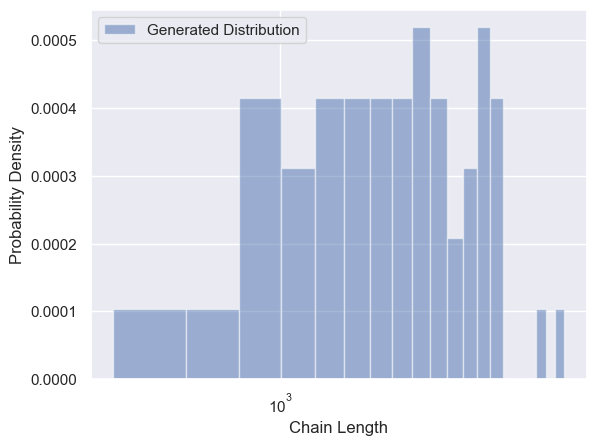

In [63]:

plt.hist(chain_lengths, bins=20, density=True, alpha=0.5, label="Generated Distribution")
plt.xscale('log')
plt.xlabel("Chain Length")
plt.ylabel("Probability Density")
plt.legend()
plt.show()